# Regular Polytopes

In [2]:
%pylab inline

from polytopes import Hypercube
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


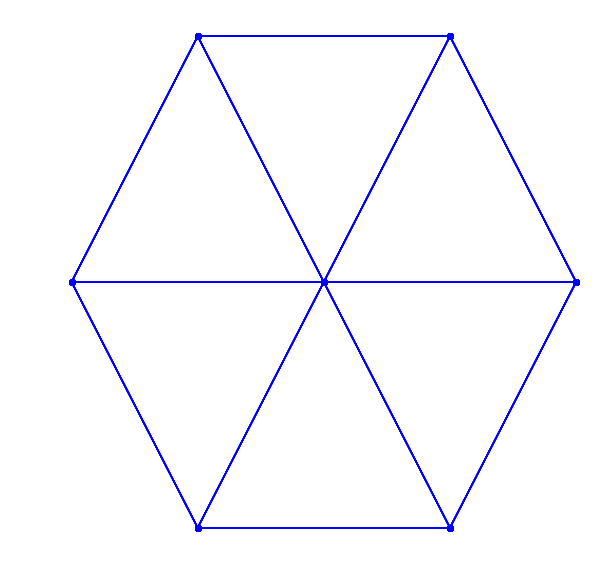

In [4]:
# dimension
N = 6

# polytope
hc = Hypercube(N)

# base
B = np.identity(N)
B[:, 0] = 1 / sqrt(N)

# Gram-Schmidt
i = 1
while i < N:
    j = 0
    while j < i:
        B[:, i] -= np.dot(B[:, i], B[:, j]) / np.dot(B[:,j], B[:,j]) * B[:, j]
        j += 1
    i += 1
B = np.matrix(B)

# Abbildung
A = np.identity(N)
A[:,0] = 0
A = np.matrix(A)

# full projection
P = A * B.I

# cut-off matrix
C = np.identity(N)
C = C[:,-2:]
C[:,:-2] = 0

# projection function
def proj(pts, P, C):
    return np.array([np.array(P.dot(pt) * C).flatten() for pt in pts])

# project coordinates
PTS = hc.coordinates - np.ones(N) * 0.5
pts = proj(PTS, P, C)

# project edges
EDGES = hc.edges - np.ones(N) * 0.5
edges = zeros((N * 2**(N-1), 2, 2))
for i in [0, 1]:
    edges[:,i] = proj(EDGES[:,i], P, C)
    
# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.axis("off")

## plot vertices
x, y = pts[:, 0], pts[:, 1]
ax.scatter(x, y, c="b")

## plot edges
for edge in edges:
    x = edge[:, 0]
    y = edge[:, 1]
    ax.plot(x, y, c="b")

## save and show plots
plt.savefig("projection.png")
plt.show()